# Prediction Using Supervised ML


## Linear Regression 
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

###  (1) Setup Enviroment 

In [1]:
# Importing libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics  
from sklearn.metrics import confusion_matrix

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

### (2) Import & Explore Data

In [3]:
# import data from link 
Data = pd.read_csv("http://bit.ly/w-data")

# Show data 
Data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Is there a relation between the number of hours studied and percentage of score? 
let's discover!

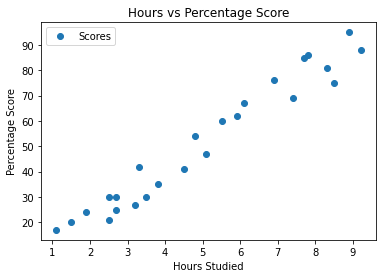

In [4]:
Data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

There is a positive linear relation!

### (3) Prapare Data

In [5]:
# Divide the data into labels & values
X = Data.iloc[:, :-1].values  
y = Data.iloc[:, 1].values  

In [6]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### (4) Train Model

In [7]:
model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression()

### (5) Make Predictions

In [8]:
# Predicting the scores by test set
y_pred = model.predict(X_test) 

In [9]:
# Actual vs Predicted
Compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
Compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Now we try to predict score when student study 9.25 Hr

In [10]:
own_pred = model.predict(np.array([[9.25,]]))
print("Predicted Score when Student Study 9.25 Hr/Day= {}".format(own_pred[0]))

Predicted Score when Student Study 9.25 Hr/Day= 93.69173248737538


### (6) Evaluate the model

In [11]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [12]:
print('Accuracy=',model.score(X_test,y_test))

Accuracy= 0.9454906892105356
